## Drug trial example

In [1]:
import numpy as np
import pymc3 as pm
import pandas as pd

drug = (101,100,102,104,102,97,105,105,98,101,100,123,105,103,100,95,102,106,
        109,102,82,102,100,102,102,101,102,102,103,103,97,97,103,101,97,104,
        96,103,124,101,101,100,101,101,104,100,101)
placebo = (99,101,100,101,102,100,97,101,104,101,102,102,100,105,88,101,100,
           104,100,100,100,101,102,103,97,101,101,100,101,99,101,100,100,
           101,100,99,101,100,102,99,100,99)

y1 = np.array(drug)
y2 = np.array(placebo)

In [2]:
with pm.Model() as drug_model:
    
    # Define priors
    
    # common df
    nu = pm.Exponential('nu', 3)
    
    # sd for each group
    sigma1 = pm.HalfCauchy('sigma1', 3)
    sigma2 = pm.HalfCauchy('sigma2', 3)
    
    # location for each group
    mu1 = pm.Normal('mu1',0,1e4)
    mu2 = pm.Normal('mu2',0,1e4)
    
    # difference in location 
    diff = pm.Deterministic('drug effect', mu1-mu2)
    
    # Define likelihood for each group as student t
    likelihood1 = pm.StudentT('y1', nu=nu, mu=mu1, sd=sigma1, observed=y1)
    likelihood2 = pm.StudentT('y2', nu=nu, mu=mu2, sd=sigma2, observed=y2)
    
    # sample
    trace_drug = pm.sample(1000, tune=2000, njobs=2) 

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [mu2, mu1, sigma2, sigma1, nu]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:07<00:00, 826.14draws/s] 


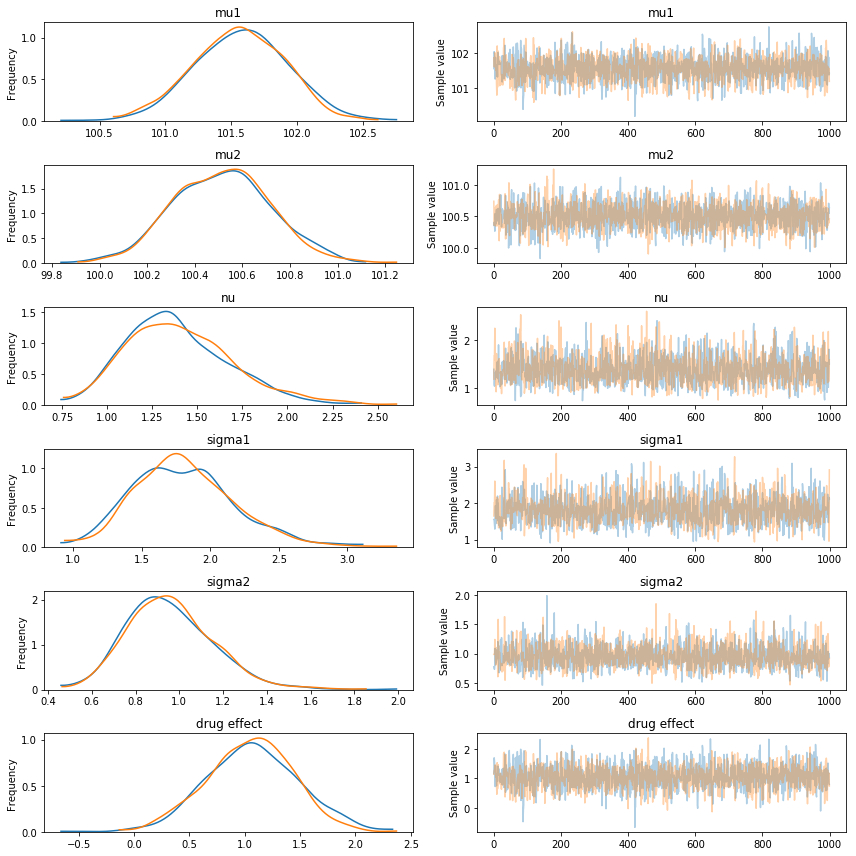

In [3]:
pm.traceplot(trace_drug);

In [4]:
with drug_model:
    approx_drug = pm.fit(n=20000, method='fullrank_advi')

  0%|          | 0/20000 [00:00<?, ?it/s]/home/nathan/anaconda3/envs/bios8366/lib/python3.6/site-packages/theano/tensor/subtensor.py:2320: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]
/home/nathan/anaconda3/envs/bios8366/lib/python3.6/site-packages/theano/tensor/subtensor.py:2190: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
/home/nathan/anaconda3/envs/bios8366/lib/python3.6/site-packages/theano/tensor/basic.py:6592: FutureWarning: Using a non-tuple sequence for mul

/home/nathan/anaconda3/envs/bios8366/lib/python3.6/site-packages/theano/tensor/subtensor.py:2320: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


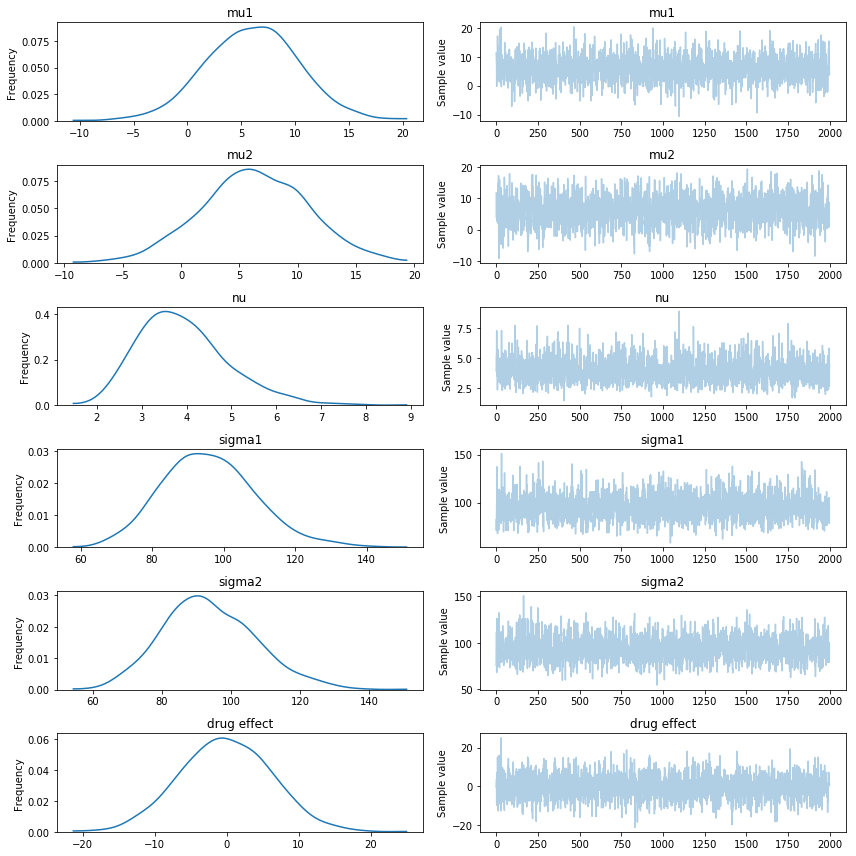

In [5]:
trace_drug_vi = approx_drug.sample(draws=2000) 
pm.traceplot(trace_drug_vi);